In [ ]:
# !pip install -U nltk
# import nltk
# nltk.download('stopwords')

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.1.0


In [2]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [3]:
articles = []
labels = []

with open("./data/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [11]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [13]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [14]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [15]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2873, 1505, 352, 4740, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2366, 347, 4741, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1866, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1608, 4999, 542, 492, 1, 1443, 4742, 778, 1320, 1, 1863, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1506, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4736, 1, 1, 1, 1, 1, 850, 39, 1827, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [16]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [18]:
print(train_sequences[10])


[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2873, 1505, 352, 4740, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2366, 347, 4741, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1866, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1608, 4999, 542, 492, 1, 1443, 4742, 778, 1320, 1, 1863, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1506, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4736, 1, 1, 1, 1, 1, 850, 39, 1827, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [19]:
print(train_padded[10])

[2431    1  225 4996   22  641  587  225 4996    1    1 1663    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1144 1694    1 1721 4997    1    1    1    1    1 4739    1    1
  122 4515    1    2 2873 1505  352 4740    1   52  341    1  352 2172
 3962   41   22 3795    1    1    1    1  542    1    1    1  835  631
 2366  347 4741    1  365   22    1  787 2367    1 4302  138   10    1
 3664  682 3532    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  599    1 1694 1021    1 4998  808 1866  117    1    1
    1 2973   22    1   99  278    1 1608 4999  542  492    1 1443 4742
  778 1320    1 1863   10   33  641  319    1   62  478  565  301 1506
   22  479    1    1 1666    1  797    1 3066    1 1365    6    1 2431
  565   22 2970 4736    1    1    1    1    1  850   39 1827  675  297
   26  979    1  882   22  361   22   13  301 1506 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [20]:
print(train_sequences[0])


[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1304, 4289, 129, 175, 3653, 1213, 1194, 1577, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3261, 1214, 2421, 570, 451, 1376, 58, 3379, 3522, 1661, 8, 921, 730, 10, 844, 1, 9, 598, 1578, 1107, 395, 1942, 1106, 731, 49, 537, 1398, 2012, 1624, 134, 249, 113, 2355, 795, 4981, 980, 584, 10, 3957, 3958, 921, 2562, 129, 344, 175, 3653, 1, 1, 39, 62, 2866, 28, 9, 4724, 18, 1305, 136, 416, 7, 143, 1423, 71, 4502, 436, 4982, 91, 1107, 77, 1, 82, 2013, 53, 1, 91, 6, 1008, 609, 89, 1304, 91, 1964, 131, 137, 420, 9, 2867, 38, 152, 1234, 89, 1304, 4725, 7, 436, 4982, 3153, 6, 2492, 1, 431, 1126, 1, 1424, 571, 1261, 1904, 1, 766, 9, 537, 1398, 2012, 134, 2069, 400, 845, 1965, 1601, 34, 1717, 2868, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1172, 1195, 152, 720, 591, 1, 124, 28, 1305, 1690, 432, 83, 933, 115, 20, 14, 18, 3154, 1, 37, 1484, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1965, 1359, 328, 1, 299, 732, 1173, 18, 2869, 1717, 1, 294, 756, 1074, 395, 2014, 387, 431

In [21]:
print(train_padded[0])


[  91  160 1141 1106   49  979  755    1   89 1304 4289  129  175 3653
 1213 1194 1577   42    7  893   91    1  334   85   20   14  130 3261
 1214 2421  570  451 1376   58 3379 3522 1661    8  921  730   10  844
    1    9  598 1578 1107  395 1942 1106  731   49  537 1398 2012 1624
  134  249  113 2355  795 4981  980  584   10 3957 3958  921 2562  129
  344  175 3653    1    1   39   62 2866   28    9 4724   18 1305  136
  416    7  143 1423   71 4502  436 4982   91 1107   77    1   82 2013
   53    1   91    6 1008  609   89 1304   91 1964  131  137  420    9
 2867   38  152 1234   89 1304 4725    7  436 4982 3153    6 2492    1
  431 1126    1 1424  571 1261 1904    1  766    9  537 1398 2012  134
 2069  400  845 1965 1601   34 1717 2868    1    1 2422  244    9 2624
   82  732    6 1172 1195  152  720  591    1  124   28 1305 1690  432
   83  933  115   20   14   18 3154    1   37 1484    1   23   37   87
  335 2356   37  467  255 1965 1359  328    1  299  732 1173   18 2869
 1717 

In [22]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [23]:
print(set(labels))


{'entertainment', 'politics', 'tech', 'business', 'sport'}


In [25]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [26]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [28]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 9s - loss: 1.5279 - accuracy: 0.3129 - val_loss: 1.3207 - val_accuracy: 0.3708
Epoch 2/10
1780/1780 - 6s - loss: 1.1085 - accuracy: 0.5202 - val_loss: 0.8856 - val_accuracy: 0.6135
Epoch 3/10
1780/1780 - 7s - loss: 0.5176 - accuracy: 0.8331 - val_loss: 0.3682 - val_accuracy: 0.8719
Epoch 4/10
1780/1780 - 5s - loss: 0.1706 - accuracy: 0.9449 - val_loss: 0.3344 - val_accuracy: 0.9056
Epoch 5/10
1780/1780 - 5s - loss: 0.0673 - accuracy: 0.9871 - val_loss: 0.2441 - val_accuracy: 0.9326
Epoch 6/10
1780/1780 - 5s - loss: 0.0216 - accuracy: 0.9955 - val_loss: 0.2618 - val_accuracy: 0.9371
Epoch 7/10
1780/1780 - 5s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9438
Epoch 8/10
1780/1780 - 5s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2640 - val_accuracy: 0.9416
Epoch 9/10
1780/1780 - 6s - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.2872 - val_accuracy: 0.9326
Epoch 10/10
1780/1780 - 5s - loss: 

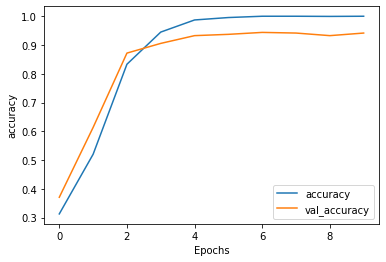

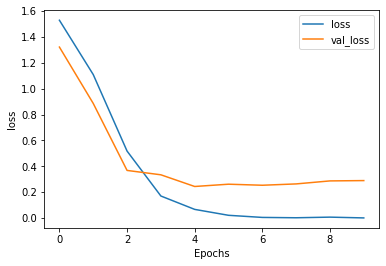

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
import tensorflowjs as tfjs
tfjs_target_dir = './results/model/custom_nlc_tf2'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

In [48]:
txt = ["cole faces lengthy injury lay-off aston villa s carlton cole could be out for six weeks with a knee injury.  the striker  who is on a season-long loan from chelsea  picked up the knock in an england under-21 match against holland earlier this month.  carlton will be out of action for four to six weeks after a bad challenge   said villa boss david o leary.  i won t be able to tell you whether he will need an operation until maybe next week. whether he has an operation has got to be left to chelsea.  cole  who also struggled with an ankle problem earlier in the season  was unable to rest because o leary had a shortage of strikers. the return to fitness of darius vassell after four months out with a broken ankle and the emergence of luke moore has alleviated some of the villa s manager s problems in that department."]
seq = tokenizer.texts_to_sequences(txt)
print(len(seq[0]))
print(seq[0])
padded = pad_sequences(seq, maxlen=max_length)
print(padded)
pred = model.predict(padded)
print(np.argmax(pred))
# print(set(labels))
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred) - 1])

156
[2438, 1196, 1, 339, 3806, 790, 3265, 3266, 1509, 1, 2438, 11, 2269, 610, 1610, 99, 417, 2131, 1261, 2424, 339, 1226, 1540, 1, 1757, 583, 1261, 281, 111, 2802, 1, 392, 1221, 172, 1226, 3807, 609, 1, 66, 2430, 1144, 251, 1, 4528, 286, 1998, 149, 1, 4471, 2269, 610, 1581, 201, 1610, 103, 552, 99, 417, 1, 1261, 772, 878, 2, 3266, 559, 336, 3850, 1, 3302, 1, 1453, 2269, 202, 552, 1425, 3000, 240, 1, 4471, 127, 1, 1442, 1, 1696, 36, 69, 240, 1, 1, 1, 1442, 1, 166, 552, 2269, 222, 552, 392, 2438, 1, 6, 3283, 2131, 1, 3179, 402, 286, 609, 1226, 281, 4447, 2075, 552, 926, 1, 3850, 1, 3791, 1261, 1, 1581, 1, 1226, 329, 552, 3407, 1581, 1, 1, 1, 103, 115, 610, 2131, 1261, 1368, 3179, 1806, 1226, 1, 1581, 1, 2888, 1, 1, 1, 1581, 1226, 3266, 1509, 399, 1509, 350, 609, 652, 773]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

In [43]:
import json
word_index_json = tokenizer.word_index
with open('word_index.json', 'w') as f:
        json.dump(word_index_json, f)